In [3]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import statsmodels.stats as sms
import pylab 
import scipy.stats as stats 
import matplotlib.pyplot as plt
import numpy as np

In [32]:
df = pd.read_csv('UScrime.csv')
df.head(10)

,y,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2
0,79.1,151,1,91,58,56,510,950,33,301,108,41
1,163.5,143,0,113,103,95,583,1012,13,102,96,36
2,57.8,142,1,89,45,44,533,969,18,219,94,33
3,196.9,136,0,121,149,141,577,994,157,80,102,39
4,123.4,141,0,121,109,101,591,985,18,30,91,20
5,68.2,121,0,110,118,115,547,964,25,44,84,29
6,96.3,127,1,111,82,79,519,982,4,139,97,38
7,155.5,131,1,109,115,109,542,969,50,179,79,35
8,85.6,157,1,90,65,62,553,955,39,286,81,28
9,70.5,140,0,118,71,68,632,1029,7,15,100,24


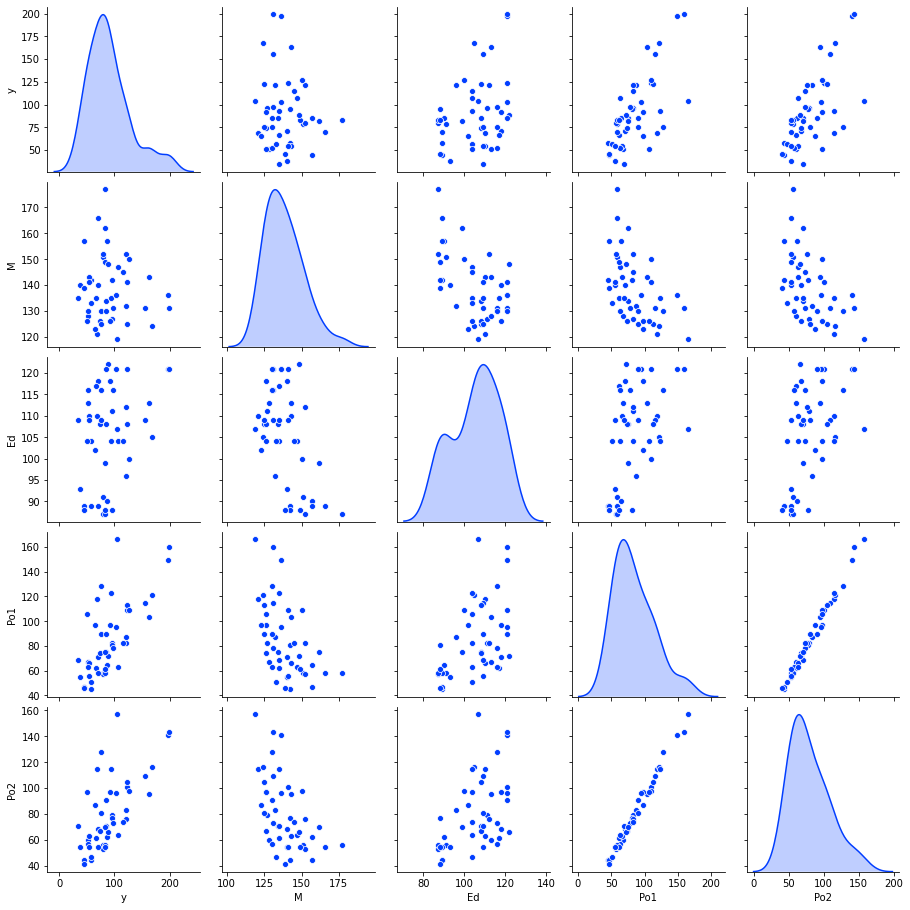

In [33]:
sns.set_palette('bright')
sns.pairplot(df.drop(columns = ['So']).iloc[:,:5], diag_kind = 'kde', height = 2.5)

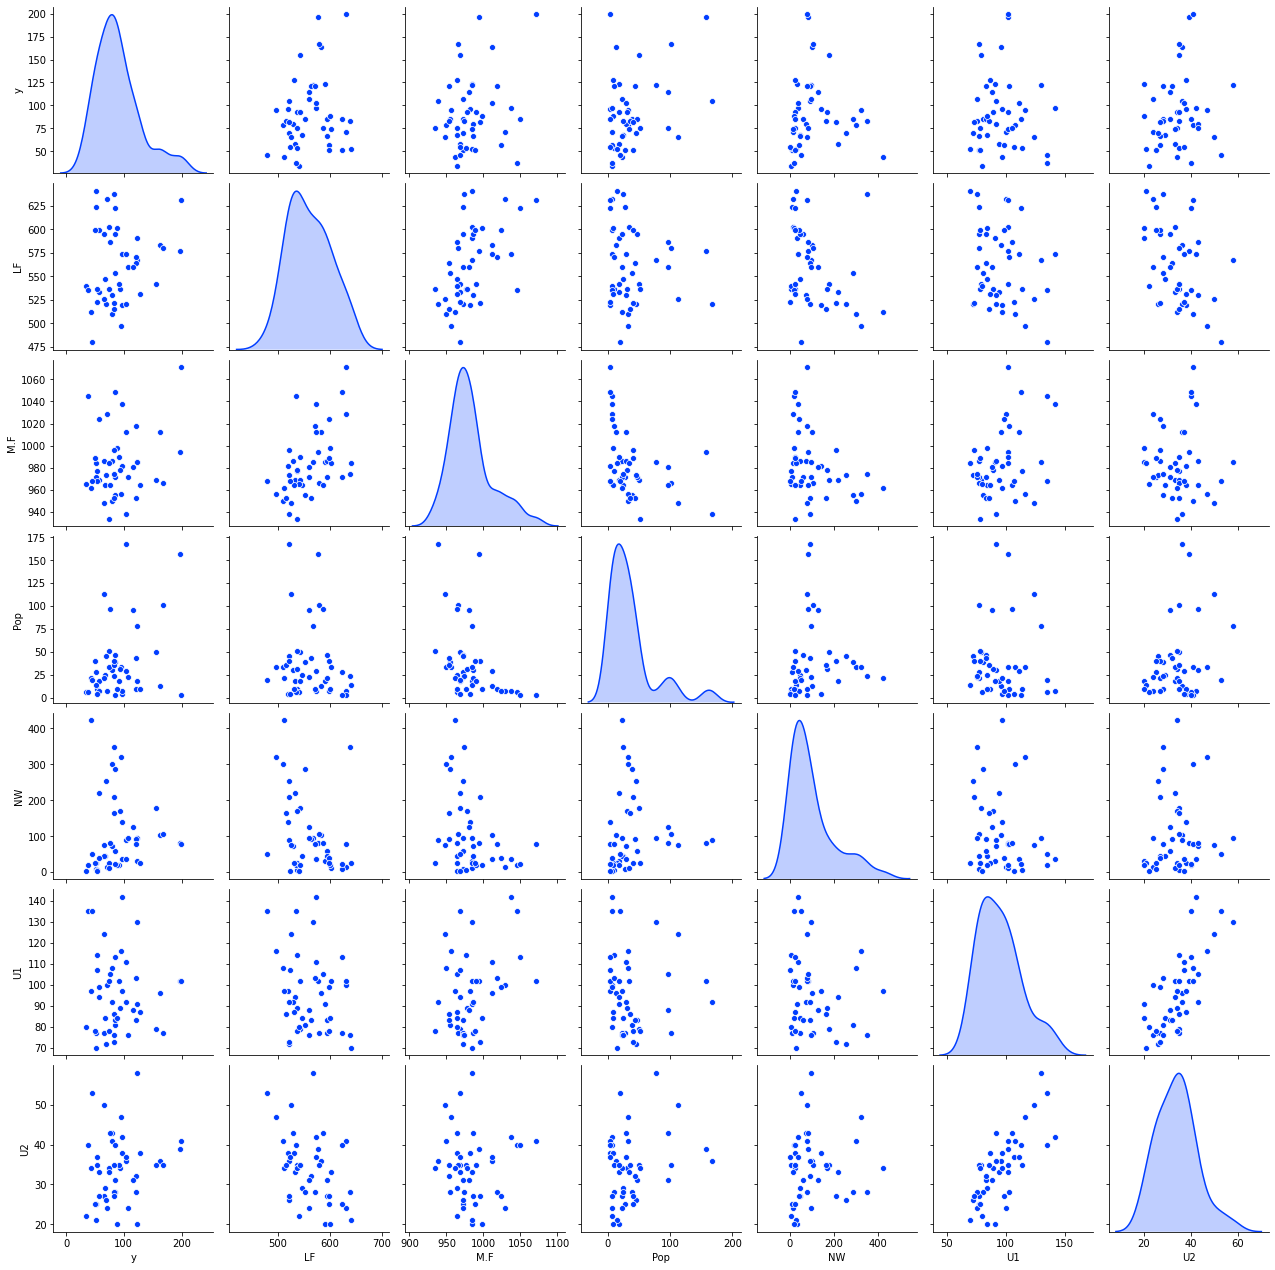

In [81]:
sns.pairplot(df.drop(columns = df.columns[1:6]), diag_kind = 'kde', height = 2.5)

Del pairplot podemos ver a simple vista dos cosas importantes. Primero, "Po1" y "Po2" están fuertemente correlacionadas; y parece que hay una relación importante entre "y" y "Ed". Como tenemos 11 posibles predictores para "y", tenemos $2^{11}$ posibles modelos lineales (sin considerar términos de orden cuadrático o superior). Intentaremos dar el mejor modelo posible, evaluado con el AIC. Comencemos con el modelo que incluye todas las variables.

In [37]:
x = df.iloc[:,1:]
X = sm.add_constant(x)
y = df.iloc[:,0]

In [39]:
lm = sm.OLS(y,X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     6.907
Date:                Wed, 01 Jul 2020   Prob (F-statistic):           4.96e-06
Time:                        11:07:01   Log-Likelihood:                -210.86
No. Observations:                  47   AIC:                             445.7
Df Residuals:                      35   BIC:                             467.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -596.7139    170.296     -3.504      0.001    -942.433    -250.995
M              1.0276      0.477      2.154      0.038       0.059       1.996
So            10.0301     15.814      0.634      0.530     -22.074      42.134
Ed             1.1354      0.677      1.676      0.103      -0.240       2.511
Po1            1.8055      1.199      1.506      0.141      -0.628       4.239
Po2           -1.0834      1.293     -0.838      0.408      -3.707       1.541
LF             0.0603      0.171      0.353      0.726      -0.286       0.406
M.F            0.3173      0.233      1.361      0.182      -0.156       0.790
Pop            0.0856      0.141      0.608      0.547      -0.200       0.371
NW             0.0341      0.069      0.495      0.624      -0.106       0.174
U1            -0.6801      0.493     -1.379      0.177      -1.681       0.321
U2             1.9881      0.953      2.086      0.044       0.053       3.923
==============================================================================
Omnibus:                        2.751   Durbin-Watson:                   1.773
Prob(Omnibus):                  0.253   Jarque-Bera (JB):                2.096
Skew:                           0.515   Prob(JB):                        0.351
Kurtosis:                       3.098   Cond. No.                     5.44e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Probemos ahora quitando "Po2" que sabemos está fuertemente correlacionada. Después haremos una selección stepwise y determinaremos cuál modelo tiene el mejor AIC.

In [78]:
X_2 = X.drop(columns = ['Po2', 'So'])
lm2 = sm.OLS(y,X_2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     8.489
Date:                Wed, 01 Jul 2020   Prob (F-statistic):           9.58e-07
Time:                        11:24:27   Log-Likelihood:                -211.66
No. Observations:                  47   AIC:                             443.3
Df Residuals:                      37   BIC:                             461.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -622.4306    166.614     -3.736      0.001    -960.022    -284.839
M              1.0799      0.469      2.303      0.027       0.130       2.030
Ed             0.9543      0.641      1.489      0.145      -0.344       2.253
Po1            0.7688      0.214      3.589      0.001       0.335       1.203
LF             0.0471      0.143      0.331      0.743      -0.242       0.336
M.F            0.3697      0.219      1.685      0.100      -0.075       0.814
Pop            0.0960      0.139      0.691      0.494      -0.186       0.378
NW             0.0516      0.055      0.933      0.357      -0.060       0.164
U1            -0.7975      0.442     -1.805      0.079      -1.693       0.098
U2             2.1984      0.911      2.413      0.021       0.352       4.044
==============================================================================
Omnibus:                        0.986   Durbin-Watson:                   1.746
Prob(Omnibus):                  0.611   Jarque-Bera (JB):                1.047
Skew:                           0.286   Prob(JB):                        0.592
Kurtosis:                       2.546   Cond. No.                     5.37e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
def stepwise_reg(X, y, features):
    usable_features = features
    for i in range(len(features)-1):
        usable_features = usable_features[:-1]
        X_s = X[usable_features]
        lm = sm.OLS(y,X_s).fit()
        print("Se usaron las variables: ")
        print(usable_features)
        print("AIC: %d" % lm.aic)
        print(" ")
        

In [80]:
stepwise_reg(X_2, y, X_2.columns)

Se usaron las variables: 
Index(['const', 'M', 'Ed', 'Po1', 'LF', 'M.F', 'Pop', 'NW', 'U1'], dtype='object')
AIC: 448
 
Se usaron las variables: 
Index(['const', 'M', 'Ed', 'Po1', 'LF', 'M.F', 'Pop', 'NW'], dtype='object')
AIC: 446
 
Se usaron las variables: 
Index(['const', 'M', 'Ed', 'Po1', 'LF', 'M.F', 'Pop'], dtype='object')
AIC: 445
 
Se usaron las variables: 
Index(['const', 'M', 'Ed', 'Po1', 'LF', 'M.F'], dtype='object')
AIC: 444
 
Se usaron las variables: 
Index(['const', 'M', 'Ed', 'Po1', 'LF'], dtype='object')
AIC: 444
 
Se usaron las variables: 
Index(['const', 'M', 'Ed', 'Po1'], dtype='object')
AIC: 443
 
Se usaron las variables: 
Index(['const', 'M', 'Ed'], dtype='object')
AIC: 476
 
Se usaron las variables: 
Index(['const', 'M'], dtype='object')
AIC: 479
 
Se usaron las variables: 
Index(['const'], dtype='object')
AIC: 477
 


Usando, como dijimos, el AIC para seleccionar el mejor modelo, concluimos que el mejor modelo lineal es

$$y = \beta_0 + \beta_1M+\beta_2Ed + \beta_3 Po1$$